   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing Values Before Handling:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who           

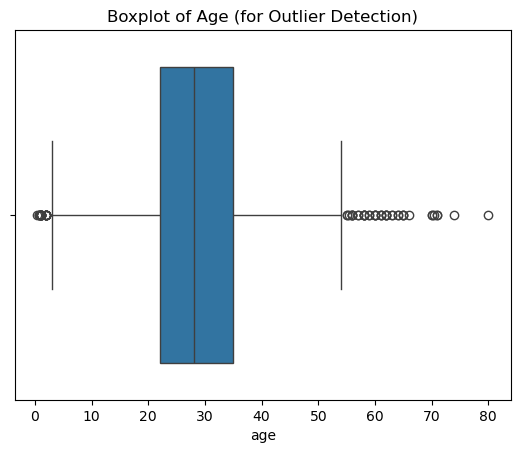

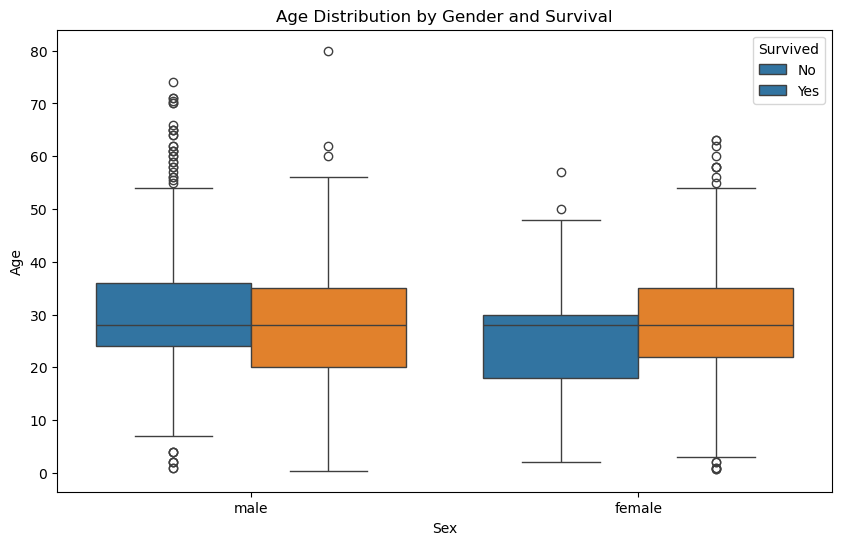

In [1]:
# Problem Statement:
# 9 Data Visualization II
# 1. Use the inbuilt dataset 'titanic' as used in the above problem. 
#    Plot a box plot for distribution of age with respect to each gender 
#    along with the information about whether they survived or not. 
#    (Column names: 'sex' and 'age')
# 2. Write observations on the inference from the above statistics.

# Step 1: Import necessary libraries
import seaborn as sns                 # For loading dataset and visualizations
import matplotlib.pyplot as plt      # For plotting graphs
import pandas as pd                  # For data manipulation

# Step 2: Load Titanic dataset
df = sns.load_dataset('titanic')     # Load the built-in Titanic dataset
print(df.head())                     # Display first 5 rows of the dataset

# Step 3: Data Preprocessing

# a) Check for missing values in all columns
print("\nMissing Values Before Handling:\n", df.isnull().sum())

# b) Handle missing values

# Fill missing values in 'age' column with the median age
df['age'] = df['age'].fillna(df['age'].median())

# Drop 'deck' column due to excessive missing data
df.drop(columns=['deck'], inplace=True)

# Fill missing values in 'embarked' and 'embark_town' with their most frequent (mode) values
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Confirm all missing values are handled
print("\nMissing Values After Handling:\n", df.isnull().sum())

# Step 4: Visualize outliers in 'age' using a boxplot
sns.boxplot(x=df['age'])            # Create a boxplot for age column
plt.title('Boxplot of Age (for Outlier Detection)')
plt.show()

# Step 5: Normalize 'age' (Optional – mostly used for modeling)
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler

scaler = MinMaxScaler()                         # Create a scaler object
df['age_scaled'] = scaler.fit_transform(df[['age']])  # Add scaled 'age' as new column

# Step 6: Create the main boxplot
# Distribution of age grouped by gender and survival status

plt.figure(figsize=(10, 6))                    # Set the figure size
sns.boxplot(x='sex', y='age', hue='survived', data=df)  # Grouped boxplot
plt.title('Age Distribution by Gender and Survival')    # Set title
plt.xlabel('Sex')                                        # Label x-axis
plt.ylabel('Age')                                        # Label y-axis
plt.legend(title='Survived', labels=['No', 'Yes'])       # Customize legend
plt.show()

# Step 7: Observations and Inference (based on the plot)
# -----------------------------------------------------
# - X-axis (Sex): Categories are 'male' and 'female'
# - Y-axis (Age): Age of passengers
# - Hue (Color): Survival status
#     Blue = Did not survive (Survived = 0)
#     Orange = Survived (Survived = 1)

# Key Observations:
# - **Males**:
#   - Non-survivors: Median age ~30 years, wide range, many adult deaths
#   - Survivors: Lower median age (~25 or less), suggesting children had better survival
# - **Females**:
#   - Survivors: Median age slightly above 30, wider IQR than males
#   - Indicates women of all ages had better survival chances
# - **Outliers**:
#   - Exist in both genders — older passengers and infants
# - **Survival Trends**:
#   - Females had higher survival overall
#   - Young male children also had higher survival chances
#   - Older males had the lowest survival

# Final Conclusion:
# - Gender and age played a significant role in survival
# - Women and children were given priority during rescue
